### Import Data

In [1]:
#!pip install datasets

In [2]:
import datasets
import pandas as pd
import matplotlib.pyplot as plt
import ast
import wordcloud

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# Dataset Ref:
# https://huggingface.co/datasets/fabiochiu/medium-articles
data = datasets.load_dataset('fabiochiu/medium-articles', data_files= 'medium_articles.csv')

# converting the dataset_dictionary object to pandas dataframe
data = pd.DataFrame.from_dict(data['train'])

  0%|          | 0/1 [00:00<?, ?it/s]

<h3> Data description </h3> <br>

Each row in the data is a different article published on Medium. For each article, you have the following features: <br>
<br>
<li>title [string]: The title of the article.
<li>text [string]: The text content of the article.
<li>url [string]: The URL associated to the article.
<li>authors [list of strings]: The article authors.
<li>timestamp [string]: The publication datetime of the article.
<li>tags [list of strings]: List of tags associated to the article.

### Simple Data Analysis

In [5]:
data.shape
data.columns
data.head()

(192368, 6)

Index(['title', 'text', 'url', 'authors', 'timestamp', 'tags'], dtype='object')

,title,text,url,authors,timestamp,tags
0,Mental Note Vol. 24,Photo by Josh Riemer on Unsplash\n\nMerry Chri...,https://medium.com/invisible-illness/mental-no...,['Ryan Fan'],2020-12-26 03:38:10.479000+00:00,"['Mental Health', 'Health', 'Psychology', 'Sci..."
1,Your Brain On Coronavirus,Your Brain On Coronavirus\n\nA guide to the cu...,https://medium.com/age-of-awareness/how-the-pa...,['Simon Spichak'],2020-09-23 22:10:17.126000+00:00,"['Mental Health', 'Coronavirus', 'Science', 'P..."
2,Mind Your Nose,Mind Your Nose\n\nHow smell training can chang...,https://medium.com/neodotlife/mind-your-nose-f...,[],2020-10-10 20:17:37.132000+00:00,"['Biotechnology', 'Neuroscience', 'Brain', 'We..."
3,The 4 Purposes of Dreams,Passionate about the synergy between science a...,https://medium.com/science-for-real/the-4-purp...,['Eshan Samaranayake'],2020-12-21 16:05:19.524000+00:00,"['Health', 'Neuroscience', 'Mental Health', 'P..."
4,Surviving a Rod Through the Head,"You’ve heard of him, haven’t you? Phineas Gage...",https://medium.com/live-your-life-on-purpose/s...,['Rishav Sinha'],2020-02-26 00:01:01.576000+00:00,"['Brain', 'Health', 'Development', 'Psychology..."


In [7]:
data.dtypes
data.isnull().sum()

# most of the columns are text hence they are read as Object.
# one column can be converted to timestamp
# 2 columns are represented as list ['authors', 'tags']

title        object
text         object
url          object
authors      object
timestamp    object
tags         object
dtype: object

title        5
text         0
url          0
authors      0
timestamp    2
tags         0
dtype: int64

In [8]:
# converting timestamp to datetime object
data['timestamp'] = pd.to_datetime(data['timestamp'], format = "%Y-%m-%d", utc = True)

# extracting year and month from the timestamp column
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month

#### Year-wise Articles

Text(0, 0.5, 'frequency')

Text(0.5, 0, 'year')

Text(0.5, 1.0, 'Yearwise # Articles')

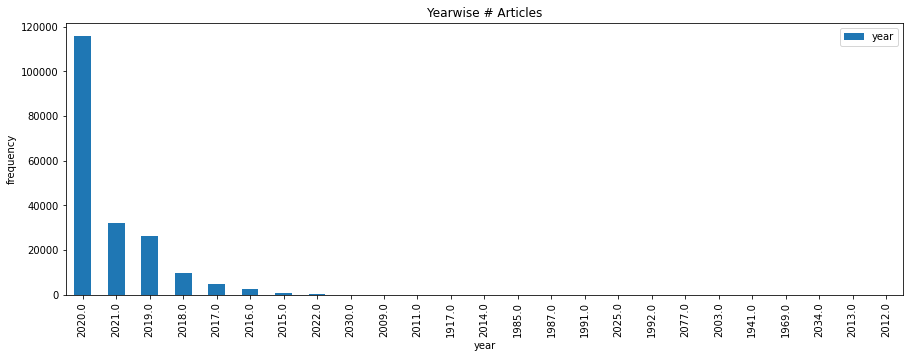

In [9]:
pd.DataFrame(data['year'].value_counts()).plot(kind = 'bar', figsize = (15,5))
plt.ylabel('frequency')
plt.xlabel('year')
plt.title('Yearwise # Articles')

#### Year month wise articles

Text(0, 0.5, 'frequency')

Text(0.5, 0, 'year-month')

Text(0.5, 1.0, 'Year-monthwise # Articles')

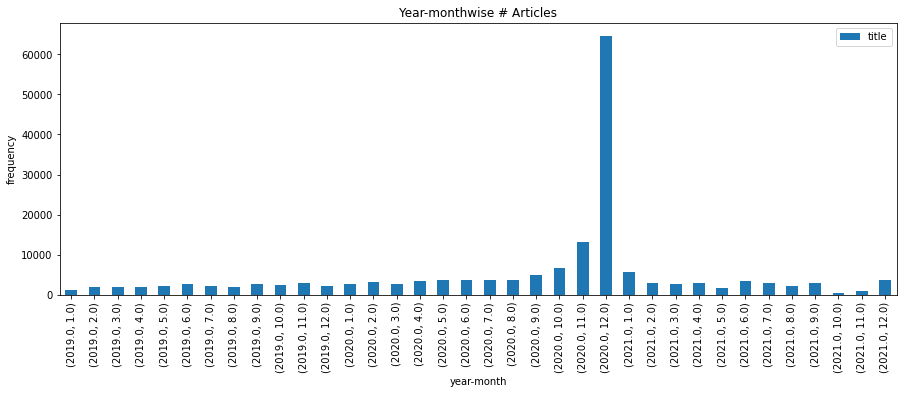

In [10]:
pd.DataFrame(data[data['year'].isin([2019, 2020, 2021])].groupby(['year', 'month'])['title'].count()).plot(kind = 'bar', figsize = (15,5))
plt.ylabel('frequency')
plt.xlabel('year-month')
plt.title('Year-monthwise # Articles')

In [11]:
# the columns are loaded as strings, Lets convert them to list
data['authors'] = [ast.literal_eval(x) for x in data['authors']]
data['tags'] = [ast.literal_eval(x) for x in data['tags']]

#### num of authors

In [12]:
data['num_authors'] = [len(x) for x in data['authors']]

(0.0, 10.0)

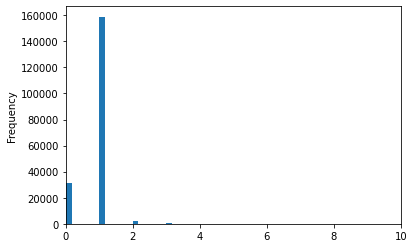

In [13]:
data['num_authors'].plot(kind = 'hist', bins = 60)
plt.xlim((0,10))

q1. how many articles have authors more than 50 <br>

q2. which article has the most authors

#### Authors and Article Tags

In [14]:
sub_df = data[['title','authors', 'tags']]
auth_df = sub_df.explode('authors')
tag_df = sub_df.explode('tags')

In [15]:
pd.DataFrame(auth_df['authors'].value_counts())[:20]

,authors
Are You Syrious,206
John Au-Yeung,167
The Good Men Project,155
J.D. Harms,152
Scott Myers,143
Gaurav Shah,138
Tds Editors,124
Shamontiel L. Vaughn,122
Martino Pietropoli,115
James Finn,114


In [16]:
pd.DataFrame(tag_df['tags'].value_counts())[:20]

,tags
Blockchain,7534
Data Science,7410
Technology,6384
Programming,6364
Poetry,6336
Cryptocurrency,6245
Machine Learning,6055
Life,5954
Bitcoin,5800
Writing,5115


(-0.5, 699.5, 399.5, -0.5)

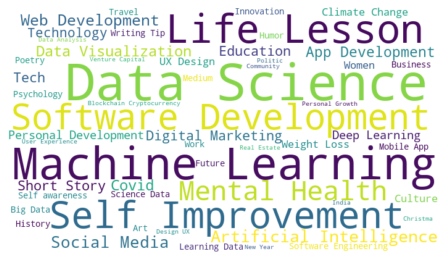

In [17]:
wdcld = wordcloud.WordCloud(prefer_horizontal=2, width=700,height=400, 
                            min_font_size=10, background_color="white",mode='RGBA').generate(' '.join(tag_df['tags'].values.tolist()))
plt.imshow(wdcld, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

#### Duplicate Records

In [18]:
data[data['title'] == 'Latest picks: In case you missed them:']['text'].values

array(['Get this newsletter By signing up, you will create a Medium account if you don’t already have one. Review our Privacy Policy for more information about our privacy practices.\n\nCheck your inbox\n\nMedium sent you an email at to complete your subscription.',
       'Get this newsletter By signing up, you will create a Medium account if you don’t already have one. Review our Privacy Policy for more information about our privacy practices.\n\nCheck your inbox\n\nMedium sent you an email at to complete your subscription.',
       'Get this newsletter By signing up, you will create a Medium account if you don’t already have one. Review our Privacy Policy for more information about our privacy practices.\n\nCheck your inbox\n\nMedium sent you an email at to complete your subscription.',
       'Get this newsletter By signing up, you will create a Medium account if you don’t already have one. Review our Privacy Policy for more information about our privacy practices.\n\nCheck your in

In [19]:
data[data['title'] == 'Latest picks: In case you missed them:']
# the title, text, appears to be same
# but url's are different, may be article is not accessible without subscription
# lets drop such records

,title,text,url,authors,timestamp,tags,year,month,num_authors
6720,Latest picks: In case you missed them:,"Get this newsletter By signing up, you will cr...",https://towardsdatascience.com/latest-picks-th...,[Tds Editors],2020-11-05 14:36:08.216000+00:00,"[The Daily Pick, Data Science, Machine Learnin...",2020.0,11.0,1
14428,Latest picks: In case you missed them:,"Get this newsletter By signing up, you will cr...",https://towardsdatascience.com/latest-picks-ex...,[Tds Editors],2020-12-09 14:27:36.237000+00:00,"[Machine Learning, The Daily Pick, Editors Pic...",2020.0,12.0,1
18776,Latest picks: In case you missed them:,"Get this newsletter By signing up, you will cr...",https://towardsdatascience.com/latest-picks-ba...,[Tds Editors],2020-11-26 14:27:08.260000+00:00,"[Machine Learning, The Daily Pick, Editors Pic...",2020.0,11.0,1
19275,Latest picks: In case you missed them:,"Get this newsletter By signing up, you will cr...",https://towardsdatascience.com/latest-picks-da...,[Tds Editors],2020-11-16 14:27:11.708000+00:00,"[Machine Learning, Data Science, Editors Pick,...",2020.0,11.0,1
19332,Latest picks: In case you missed them:,"Get this newsletter By signing up, you will cr...",https://towardsdatascience.com/latest-picks-ho...,[Tds Editors],2020-11-23 14:27:23.608000+00:00,"[Machine Learning, The Daily Pick, Editors Pic...",2020.0,11.0,1
20287,Latest picks: In case you missed them:,"Get this newsletter By signing up, you will cr...",https://towardsdatascience.com/latest-picks-a-...,[Tds Editors],2020-12-22 14:27:48.883000+00:00,"[Machine Learning, The Daily Pick, Editors Pic...",2020.0,12.0,1
21409,Latest picks: In case you missed them:,"Get this newsletter By signing up, you will cr...",https://towardsdatascience.com/latest-picks-ti...,[Tds Editors],2020-11-04 14:27:20.432000+00:00,"[Machine Learning, Data Science, Deep Learning...",2020.0,11.0,1
23263,Latest picks: In case you missed them:,"Get this newsletter By signing up, you will cr...",https://towardsdatascience.com/latest-picks-st...,[Tds Editors],2020-10-26 13:28:13.648000+00:00,[The Daily Pick],2020.0,10.0,1
25355,Latest picks: In case you missed them:,"Get this newsletter By signing up, you will cr...",https://towardsdatascience.com/latest-picks-in...,[Tds Editors],2020-10-22 13:32:18+00:00,[The Daily Pick],2020.0,10.0,1
25383,Latest picks: In case you missed them:,"Get this newsletter By signing up, you will cr...",https://towardsdatascience.com/latest-picks-th...,[Tds Editors],2020-12-14 14:27:26.660000+00:00,"[Data Science, Machine Learning, The Daily Pic...",2020.0,12.0,1


### You can either let them be since the url's are differnt or drop the duplicates based on title and text as subset